In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.svm import SVR

from statsmodels.stats.outliers_influence import variance_inflation_factor #用於做VIF
from google.colab import drive #讓colab連線Gdrive
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV


In [ ]:
'''VIF參考：https://juejin.cn/post/6928009636335321095'''

'VIF參考：https://juejin.cn/post/6928009636335321095'

In [ ]:
drive.mount('/content/gdrive')
a = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/111-1Regression/data-table-B2.csv')

Mounted at /content/gdrive


In [ ]:
y=a['y']
x=a.drop('y', axis=1)

In [ ]:
x1 = sm.add_constant(x)

model = sm.OLS(y, x1)
result = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**原始資料檢視**

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     8.846
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           5.30e-05
Time:                        12:57:02   Log-Likelihood:                -50.468
No. Observations:                  28   AIC:                             120.9
Df Residuals:                      18   BIC:                             134.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2919     12.813     -0.569      0.576     -34.211      19.627
x1             0.0008      0.002      0.405      0.690      -0.003       0.005
x2             0.0036      0.001      4.318      0.000       0.002       0.005
x3             0.1222      0.259      0.472      0.643      -0.422       0.666
x4             0.0319      0.042      0.767      0.453      -0.056       0.119
x5          1.511e-05      0.047      0.000      1.000      -0.098       0.098
x6             0.0016      0.003      0.490      0.630      -0.005       0.008
x7             0.1544      0.152      1.015      0.324      -0.165       0.474
x8            -0.0039      0.002     -1.898      0.074      -0.008       0.000
x9            -0.0018      0.001     -1.264      0.222      -0.005       0.001
==============================================================================
Omnibus:                        0.114   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.945   Jarque-Bera (JB):                0.143
Skew:                          -0.118   Prob(JB):                        0.931
Kurtosis:                       2.742   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
vif=[variance_inflation_factor(x1.values,x1.columns.get_loc(i)) for i in x1.columns]
list(zip(list(range(1,len(x1))),vif))

[(1, 1372.296561249537),
 (2, 4.827645380773831),
 (3, 1.4201610507219544),
 (4, 2.1265972598823892),
 (5, 1.5661069779691834),
 (6, 1.9240347397468447),
 (7, 1.275978503782737),
 (8, 5.4145716191111894),
 (9, 4.53564334982026),
 (10, 1.423389892700443)]

In [ ]:
#計算殘差
res = y - result.fittedvalues

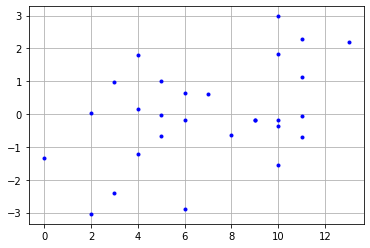

In [ ]:
plt.plot(y,res,"b.")
plt.grid(True)

In [ ]:
#shapiro-wilk test
stats.shapiro(res)

ShapiroResult(statistic=0.9738242626190186, pvalue=0.6858585476875305)

In [ ]:
#Breusch-Pagan Test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
BP_test_result = sms.het_breuschpagan(res, result.model.exog)
lzip(names, BP_test_result)

[('Lagrange multiplier statistic', 11.011341849276508),
 ('p-value', 0.27493231170773913),
 ('f-value', 1.2963168428705565),
 ('f p-value', 0.3044983057649137)]

執行RFE(留3個變數)後，資料檢視

In [ ]:
#https://ithelp.ithome.com.tw/articles/10296415
#這篇介紹了變數篩選 Recursive Feature Elimination ( RFE )的用法
#利用迴圈把i個變數的模型分別挑出最好的，去跑回歸之後找這i個模型中最好的

lirg = LinearRegression()
rfe = RFE(lirg, n_features_to_select=3, step=1, verbose=0).fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False False False  True False]
[6 3 1 1 7 5 2 1 4]


In [ ]:
lzip(x.columns, rfe.support_)

[('x1', False),
 ('x2', False),
 ('x3', True),
 ('x4', True),
 ('x5', False),
 ('x6', False),
 ('x7', False),
 ('x8', True),
 ('x9', False)]

In [ ]:
x_rfe = x.copy()
for i in range(0,9):
  if rfe.support_[i] == False:
    x_rfe=x_rfe.drop(x.columns[i], axis=1)

In [ ]:
x_rfe_1 = sm.add_constant(x_rfe)
model_rfe = sm.OLS(y, x_rfe_1)
result_rfe = model_rfe.fit()
result_rfe.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     12.41
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           4.22e-05
Time:                        12:57:03   Log-Likelihood:                -61.022
No. Observations:                  28   AIC:                             130.0
Df Residuals:                      24   BIC:                             135.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7938     10.946      0.164      0.871     -20.798      24.386
x3             0.4173      0.254      1.642      0.114      -0.107       0.942
x4             0.0757      0.046      1.641      0.114      -0.020       0.171
x8            -0.0073      0.001     -5.754      0.000      -0.010      -0.005
==============================================================================
Omnibus:                        1.322   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                1.001
Skew:                           0.184   Prob(JB):                        0.606
Kurtosis:                       2.150   Cond. No.                     5.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
res_rfe = y - result_rfe.fittedvalues

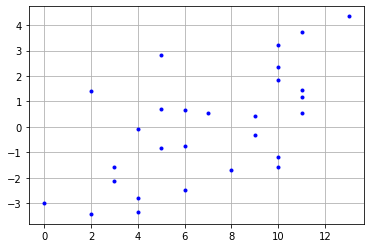

In [ ]:
plt.plot(y,res_rfe,"b.")
plt.grid(True)

In [ ]:
vif_rfe=[variance_inflation_factor(x_rfe_1.values,x_rfe_1.columns.get_loc(i)) for i in x_rfe_1.columns]
lzip(x_rfe_1.columns,vif_rfe)

[('const', 628.4432016284919),
 ('x3', 1.284695835799981),
 ('x4', 1.208848750352359),
 ('x8', 1.094922565630602)]

執行RFECV(留7個變數)後，資料檢視

In [ ]:
#測試看看給予最小變數量的結果
estimator = SVR(kernel="linear")
selector = RFECV(estimator, min_features_to_select=3, step=6, cv=5).fit(x,y)

In [ ]:
print(selector.support_)  # 哪些特徵入選最後特徵，true表示入選
print(selector.ranking_)  # 每個特徵的得分排名，特徵得分越低（1最好），表示特徵越好

[False False  True False  True False  True False False]
[2 2 1 2 1 2 1 2 2]


In [ ]:
#https://luohenyueji.gitee.io/_posts/2020-07-09-%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0-%E7%89%B9%E5%BE%81%E9%80%89%E6%8B%A9%E7%AC%94%E8%AE%B03-%E9%80%92%E5%BD%92%E5%BC%8F%E7%89%B9%E5%BE%81%E6%B6%88%E9%99%A4/
#介紹RFECV

estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5).fit(x,y)

In [ ]:
print(selector.support_)  # 哪些特徵入選最後特徵，true表示入選
print(selector.ranking_)  # 每個特徵的得分排名，特徵得分越低（1最好），表示特徵越好
print(selector.n_features_)  #  挑選了幾個特徵
print(selector.grid_scores_)  # 每次交叉迭代各個特徵得分

[False  True  True  True False  True  True  True  True]
[3 1 1 1 2 1 1 1 1]
7
[[-3.33508785e+01 -1.21663052e-01 -1.17131754e+00 -7.26521843e+00
  -2.81844736e-02]
 [-2.06023781e+01  6.29138185e-02 -1.34155414e+00 -1.32757639e+01
   6.18419322e-01]
 [-2.18718013e+01  8.06030897e-02 -7.88677820e-01 -1.23532801e+01
   7.09048203e-01]
 [-1.73817122e+01  1.33549342e-01 -7.23733553e-01 -1.20260516e+01
   7.54157112e-01]
 [-1.11854383e+01  1.24174709e-01 -1.46680499e+00 -7.11799502e+00
   4.06585161e-01]
 [-2.02479753e+01 -1.92322411e-02 -1.15280988e+00 -5.09364908e+00
   5.98205892e-01]
 [-6.03144331e+00  5.70549060e-02 -3.44018760e+00 -5.38183607e+00
   6.19465161e-01]
 [-1.45991567e+01  3.10433481e-01 -4.47960323e+00 -7.10382816e+00
   6.52301272e-01]
 [-5.10730523e+01 -3.28038350e-02 -4.12022686e-01 -8.39011682e+00
   5.82308891e-01]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lzip(x.columns, selector.support_)

[('x1', False),
 ('x2', True),
 ('x3', True),
 ('x4', True),
 ('x5', False),
 ('x6', True),
 ('x7', True),
 ('x8', True),
 ('x9', True)]

In [ ]:
x_rfecv = x.copy()
for i in range(0,9):
  if selector.support_[i] == False:
    x_rfecv=x_rfecv.drop(x.columns[i], axis=1)

In [ ]:
x_rfecv_1 = sm.add_constant(x_rfecv)
model_rfecv= sm.OLS(y, x_rfecv_1)
result_rfecv = model_rfecv.fit()
result_rfecv.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     12.50
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           4.45e-06
Time:                        12:58:51   Log-Likelihood:                -50.596
No. Observations:                  28   AIC:                             117.2
Df Residuals:                      20   BIC:                             127.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1299     10.230     -0.893      0.383     -30.468      12.209
x2             0.0036      0.001      4.693      0.000       0.002       0.005
x3             0.1671      0.222      0.751      0.461      -0.297       0.631
x4             0.0370      0.037      1.001      0.329      -0.040       0.114
x6             0.0015      0.003      0.476      0.639      -0.005       0.008
x7             0.1891      0.110      1.716      0.102      -0.041       0.419
x8            -0.0042      0.002     -2.336      0.030      -0.008      -0.000
x9            -0.0017      0.001     -1.263      0.221      -0.004       0.001
==============================================================================
Omnibus:                        0.043   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.204
Skew:                          -0.078   Prob(JB):                        0.903
Kurtosis:                       2.612   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
res_rfecv = y - result_rfecv.fittedvalues

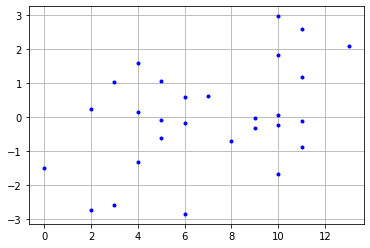

In [ ]:
plt.plot(y,res_rfecv,"b.")
plt.grid(True)

In [ ]:
vif_rfecv=[variance_inflation_factor(x_rfecv_1.values,x_rfecv_1.columns.get_loc(i)) for i in x_rfecv_1.columns]
lzip(x_rfecv_1.columns,vif_rfecv)

[('const', 963.0966329233571),
 ('x2', 1.3241346237291833),
 ('x3', 1.728095861736176),
 ('x4', 1.3590570533526096),
 ('x6', 1.2394555046446356),
 ('x7', 3.1302352622288154),
 ('x8', 3.862593518189124),
 ('x9', 1.3512929763263886)]

建立新模型

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_rfecv, y, train_size=0.8, random_state=1)

In [ ]:
x_train_1 = sm.add_constant(x_train)
model_new= sm.OLS(y_train, x_train_1)
result_new = model_new.fit()
result_new.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     14.17
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.25e-05
Time:                        12:58:52   Log-Likelihood:                -35.358
No. Observations:                  22   AIC:                             86.72
Df Residuals:                      14   BIC:                             95.45
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6023     11.535     -0.572      0.576     -31.341      18.137
x2             0.0031      0.001      3.258      0.006       0.001       0.005
x3             0.0469      0.233      0.202      0.843      -0.452       0.546
x4             0.0633      0.055      1.149      0.270      -0.055       0.182
x6             0.0005      0.004      0.132      0.897      -0.007       0.008
x7             0.2524      0.123      2.059      0.059      -0.011       0.515
x8            -0.0024      0.002     -1.087      0.295      -0.007       0.002
x9            -0.0040      0.002     -2.450      0.028      -0.007      -0.000
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.120
Skew:                          -0.085   Prob(JB):                        0.942
Kurtosis:                       3.319   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#pred_new = model_new.predict(x_train_1.T)
#pred_new

x_test_1 = sm.add_constant(x_test)
pred_df = result_new.get_prediction(x_test_1).summary_frame(alpha=0.05)
pred_df = pd.DataFrame(pred_df)
pred_df.insert(6, column="y_test", value=y_test[:])
pred_df.style.applymap(lambda x: 'background-color: rgb(255, 0, 0)',subset=pd.IndexSlice[:, 'y_test'])
#.background_gradient('Reds',subset='y_test') 做顏色漸層

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,y_test
24,4.575780,1.863606,0.578742,8.572818,-0.573020,9.724580,6
17,5.143186,1.538351,1.843752,8.442621,0.515002,9.771371,5
19,5.540388,1.622890,2.059635,9.021141,0.781242,10.299534,4
20,5.979462,1.237066,3.326218,8.632705,1.787382,10.171541,3
14,9.568787,0.594097,8.294576,10.842999,6.082035,13.055540,6
3,8.690561,1.918882,4.574967,12.806154,3.449193,13.931929,13


In [ ]:
result_new.pvalues[:]

const    0.576131
x2       0.005723
x3       0.843137
x4       0.269724
x6       0.897115
x7       0.058641
x8       0.295475
x9       0.028035
dtype: float64

In [ ]:
vif_rfecv=[variance_inflation_factor(x_train_1.values,x_train_1.columns.get_loc(i)) for i in x_train_1.columns]
lzip(x_train_1.columns,vif_rfecv)

[('const', 1278.221383767327),
 ('x2', 2.0090239149887603),
 ('x3', 2.066711365124557),
 ('x4', 2.4820666426084146),
 ('x6', 1.8058831527788344),
 ('x7', 4.530704177873223),
 ('x8', 6.068270974682215),
 ('x9', 1.8820236161734123)]

In [ ]:
res_new = result_new.resid

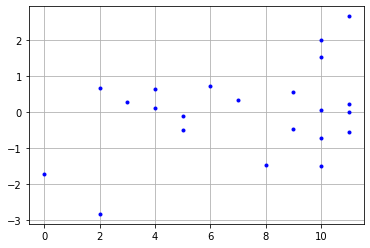

In [ ]:
plt.plot(y_train,res_new,"b.")
plt.grid(True)

In [ ]:
#shapiro-wilk test
stats.shapiro(res_new)

ShapiroResult(statistic=0.9734054207801819, pvalue=0.7883681654930115)

In [ ]:
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(res_new, result_new.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 8.995305984258827),
 ('p-value', 0.252993233582732),
 ('f-value', 1.3833937151263547),
 ('f p-value', 0.2860365682814273)]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_p = poly.fit_transform(x_train)

scal = StandardScaler()
x_train_ps = scal.fit_transform(x_train_p)

mms = MinMaxScaler()
#x_train_pm = mms.fit_transform(x_train_p)

maxabs = MaxAbsScaler()

rob = RobustScaler()


In [ ]:
x_train_ps.shape
#x_train_pm.shape

(22, 36)

In [ ]:
x_train_ps1 = sm.add_constant(x_train_ps)
model_new_p = sm.OLS(y_train, x_train_ps1)
#model_new_p = sm.OLS(y_train, x_train_pm)

result_new_p = model_new_p.fit()
result_new_p.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 30 Dec 2022   Prob (F-statistic):                nan
Time:                        12:58:52   Log-Likelihood:                 654.74
No. Observations:                  22   AIC:                            -1265.
Df Residuals:                       0   BIC:                            -1241.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1818        inf          0        nan         nan         nan
x1          1.196e-13        inf          0        nan         nan         nan
x2             8.1587        inf          0        nan         nan         nan
x3            31.8101        inf          0        nan         nan         nan
x4           -17.7818        inf         -0        nan         nan         nan
x5           -18.4048        inf         -0        nan         nan         nan
x6            -8.4776        inf         -0        nan         nan         nan
x7            13.2660        inf          0        nan         nan         nan
x8            14.2071        inf          0        nan         nan         nan
x9            -6.9554        inf         -0        nan         nan         nan
x10           -2.3593        inf         -0        nan         nan         nan
x11            0.4255        inf          0        nan         nan         nan
x12           -1.2629        inf         -0        nan         nan         nan
x13           -5.0932        inf         -0        nan         nan         nan
x14            4.7659        inf          0        nan         nan         nan
x15            4.4422        inf          0        nan         nan         nan
x16          -14.1267        inf         -0        nan         nan         nan
x17           -9.5327        inf         -0        nan         nan         nan
x18            5.1898        inf          0        nan         nan         nan
x19           -5.5396        inf         -0        nan         nan         nan
x20          -10.6009        inf         -0        nan         nan         nan
x21          -23.0460        inf         -0        nan         nan         nan
x22           13.5977        inf          0        nan         nan         nan
x23            3.2916        inf          0        nan         nan         nan
x24            8.2461        inf          0        nan         nan         nan
x25            9.5613        inf          0        nan         nan         nan
x26           -0.7763        inf         -0        nan         nan         nan
x27            7.8757        inf          0        nan         nan         nan
x28            5.1891        inf          0        nan         nan         nan
x29            0.7503        inf          0        nan         nan         nan
x30           -0.3166        inf         -0        nan         nan         nan
x31           -0.4582        inf         -0        nan         nan         nan
x32           -6.0152        inf         -0        nan         nan         nan
x33           20.6268        inf          0        nan         nan         nan
x34            3.7181        inf          0        nan         nan         nan
x35          -18.5176        inf         -0        nan         nan         nan
x3

In [ ]:
res_new_p = result_new_p.resid

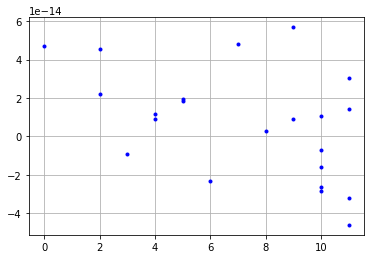

In [ ]:
plt.plot(y_train,res_new_p,"b.")
plt.grid(True)

In [ ]:
#shapiro-wilk test
stats.shapiro(res_new_p)

ShapiroResult(statistic=0.9688459038734436, pvalue=0.6843551993370056)

In [ ]:
#Breusch-Pagan Test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
BP_test_result_p = sms.het_breuschpagan(res_new_p, result_new_p.model.exog)
lzip(names, BP_test_result_p)

[('Lagrange multiplier statistic', 22.0),
 ('p-value', 0.9678094777696236),
 ('f-value', nan),
 ('f p-value', nan)]

In [ ]:
x_test_p = poly.transform(x_test)
x_test_ps = scal.fit_transform(x_test_p)
x_test_ps1 = sm.add_constant(x_test_ps)
y_pred = result_new_p.predict(x_test_ps1)
print(y_pred)
print(y_test)

[ 2.97632868 10.31492998 20.2842427  -5.93634156 -4.5999053  20.05165459]
24     6
17     5
19     4
20     3
14     6
3     13
Name: y, dtype: int64


對y做處理:取log

In [ ]:
y_ln = np.log((y+1))

In [ ]:
y_ln

0     2.397895
1     2.484907
2     2.484907
3     2.639057
4     2.397895
5     2.484907
6     2.397895
7     2.484907
8     1.609438
9     1.098612
10    2.079442
11    2.397895
12    2.302585
13    2.302585
14    1.945910
15    1.791759
16    1.791759
17    1.791759
18    1.945910
19    1.609438
20    1.386294
21    1.386294
22    1.609438
23    2.397895
24    1.945910
25    2.197225
26    1.098612
27    0.000000
Name: y, dtype: float64

In [ ]:
#lny做的資料分類
x_train, x_test, y_train_ln, y_test_ln = train_test_split(x_rfecv, y_ln, train_size=0.8, random_state=1)

In [ ]:
model_new_lny = sm.OLS(y_train_ln, x_train_1)
result_new_lny = model_new_lny.fit()
result_new_lny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     6.482
Date:                Fri, 30 Dec 2022   Prob (F-statistic):            0.00154
Time:                        12:58:52   Log-Likelihood:                -4.6323
No. Observations:                  22   AIC:                             25.26
Df Residuals:                      14   BIC:                             33.99
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3280      2.854      0.465      0.649      -4.793       7.449
x2             0.0004      0.000      1.641      0.123      -0.000       0.001
x3            -0.0284      0.058     -0.493      0.629      -0.152       0.095
x4             0.0117      0.014      0.857      0.406      -0.018       0.041
x6            -0.0005      0.001     -0.600      0.558      -0.002       0.001
x7             0.0499      0.030      1.645      0.122      -0.015       0.115
x8            -0.0004      0.001     -0.700      0.495      -0.002       0.001
x9            -0.0007      0.000     -1.752      0.102      -0.002       0.000
==============================================================================
Omnibus:                       15.147   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.448
Skew:                          -1.483   Prob(JB):                     0.000442
Kurtosis:                       5.838   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#standardscaler
x_train_s = scal.fit_transform(x_train)
x_train_s1 = sm.add_constant(x_train_s)

In [ ]:
model_new_s = sm.OLS(y_train, x_train_s1)
result_new_s = model_new_s.fit()
result_new_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     14.17
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.25e-05
Time:                        12:58:52   Log-Likelihood:                -35.358
No. Observations:                  22   AIC:                             86.72
Df Residuals:                      14   BIC:                             95.45
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1818      0.323     22.261      0.000       6.490       7.874
x1             1.4898      0.457      3.258      0.006       0.509       2.471
x2             0.0935      0.464      0.202      0.843      -0.901       1.088
x3             0.5841      0.508      1.149      0.270      -0.506       1.674
x4             0.0571      0.434      0.132      0.897      -0.873       0.987
x5             1.4137      0.687      2.059      0.059      -0.059       2.887
x6            -0.8637      0.795     -1.087      0.295      -2.568       0.841
x7            -1.0844      0.443     -2.450      0.028      -2.034      -0.135
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.120
Skew:                          -0.085   Prob(JB):                        0.942
Kurtosis:                       3.319   Cond. No.                         5.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_new_lny_s = sm.OLS(y_train_ln, x_train_s1)
result_new_lny_s = model_new_s.fit()
result_new_lny_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     14.17
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.25e-05
Time:                        12:58:52   Log-Likelihood:                -35.358
No. Observations:                  22   AIC:                             86.72
Df Residuals:                      14   BIC:                             95.45
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1818      0.323     22.261      0.000       6.490       7.874
x1             1.4898      0.457      3.258      0.006       0.509       2.471
x2             0.0935      0.464      0.202      0.843      -0.901       1.088
x3             0.5841      0.508      1.149      0.270      -0.506       1.674
x4             0.0571      0.434      0.132      0.897      -0.873       0.987
x5             1.4137      0.687      2.059      0.059      -0.059       2.887
x6            -0.8637      0.795     -1.087      0.295      -2.568       0.841
x7            -1.0844      0.443     -2.450      0.028      -2.034      -0.135
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.120
Skew:                          -0.085   Prob(JB):                        0.942
Kurtosis:                       3.319   Cond. No.                         5.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#minMaxscaler
x_train_mm = mms.fit_transform(x_train)
x_train_mm1 = sm.add_constant(x_train_mm)

In [ ]:
model_new_mm = sm.OLS(y_train, x_train_mm1)
result_new_mm = model_new_mm.fit()
result_new_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     14.17
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.25e-05
Time:                        12:58:52   Log-Likelihood:                -35.358
No. Observations:                  22   AIC:                             86.72
Df Residuals:                      14   BIC:                             95.45
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9478      2.966      1.331      0.205      -2.414      10.310
x1             4.6486      1.427      3.258      0.006       1.588       7.709
x2             0.3378      1.676      0.202      0.843      -3.257       3.932
x3             1.9827      1.725      1.149      0.270      -1.718       5.683
x4             0.2170      1.648      0.132      0.897      -3.318       3.752
x5             5.9822      2.906      2.059      0.059      -0.250      12.215
x6            -3.3757      3.106     -1.087      0.295     -10.037       3.286
x7            -4.3702      1.784     -2.450      0.028      -8.196      -0.545
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.120
Skew:                          -0.085   Prob(JB):                        0.942
Kurtosis:                       3.319   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_new_lny_mm = sm.OLS(y_train_ln, x_train_mm1)
result_new_lny_mm = model_new_lny_mm.fit()
result_new_lny_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     6.482
Date:                Fri, 30 Dec 2022   Prob (F-statistic):            0.00154
Time:                        12:58:52   Log-Likelihood:                -4.6323
No. Observations:                  22   AIC:                             25.26
Df Residuals:                      14   BIC:                             33.99
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6297      0.734      2.220      0.043       0.056       3.204
x1             0.5793      0.353      1.641      0.123      -0.178       1.336
x2            -0.2046      0.415     -0.493      0.629      -1.094       0.685
x3             0.3657      0.427      0.857      0.406      -0.550       1.281
x4            -0.2446      0.408     -0.600      0.558      -1.119       0.630
x5             1.1829      0.719      1.645      0.122      -0.359       2.725
x6            -0.5381      0.769     -0.700      0.495      -2.186       1.110
x7            -0.7733      0.441     -1.752      0.102      -1.720       0.173
==============================================================================
Omnibus:                       15.147   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.448
Skew:                          -1.483   Prob(JB):                     0.000442
Kurtosis:                       5.838   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#MaxAbsScaler
x_train_ma = maxabs.fit_transform(x_train)
x_train_ma1 = sm.add_constant(x_train_ma)

In [ ]:
model_new_ma = sm.OLS(y_train, x_train_ma1)
result_new_ma = model_new_ma.fit()
result_new_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     14.17
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.25e-05
Time:                        12:58:52   Log-Likelihood:                -35.358
No. Observations:                  22   AIC:                             86.72
Df Residuals:                      14   BIC:                             95.45
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6023     11.535     -0.572      0.576     -31.341      18.137
x1             8.9931      2.760      3.258      0.006       3.072      14.914
x2             1.9848      9.846      0.202      0.843     -19.133      23.102
x3             4.9600      4.316      1.149      0.270      -4.297      14.217
x4             0.4946      3.756      0.132      0.897      -7.562       8.551
x5            17.0380      8.276      2.059      0.059      -0.713      34.789
x6            -6.8418      6.295     -1.087      0.295     -20.344       6.660
x7           -10.6561      4.349     -2.450      0.028     -19.984      -1.328
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.120
Skew:                          -0.085   Prob(JB):                        0.942
Kurtosis:                       3.319   Cond. No.                         95.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_new_lny_ma = sm.OLS(y_train_ln, x_train_ma1)
result_new_lny_ma = model_new_ma.fit()
result_new_lny_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     14.17
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.25e-05
Time:                        12:58:52   Log-Likelihood:                -35.358
No. Observations:                  22   AIC:                             86.72
Df Residuals:                      14   BIC:                             95.45
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6023     11.535     -0.572      0.576     -31.341      18.137
x1             8.9931      2.760      3.258      0.006       3.072      14.914
x2             1.9848      9.846      0.202      0.843     -19.133      23.102
x3             4.9600      4.316      1.149      0.270      -4.297      14.217
x4             0.4946      3.756      0.132      0.897      -7.562       8.551
x5            17.0380      8.276      2.059      0.059      -0.713      34.789
x6            -6.8418      6.295     -1.087      0.295     -20.344       6.660
x7           -10.6561      4.349     -2.450      0.028     -19.984      -1.328
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.120
Skew:                          -0.085   Prob(JB):                        0.942
Kurtosis:                       3.319   Cond. No.                         95.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#RobustScaler
x_train_ro = rob.fit_transform(x_train)
x_train_ro1 = sm.add_constant(x_train_ro)

In [ ]:
model_new_ro = sm.OLS(y_train, x_train_ro1)
result_new_ro = model_new_ro.fit()
result_new_ro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     14.17
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.25e-05
Time:                        12:58:52   Log-Likelihood:                -35.358
No. Observations:                  22   AIC:                             86.72
Df Residuals:                      14   BIC:                             95.45
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3605      0.360     20.459      0.000       6.589       8.132
x1             2.0824      0.639      3.258      0.006       0.711       3.453
x2             0.1208      0.599      0.202      0.843      -1.165       1.406
x3             0.9597      0.835      1.149      0.270      -0.831       2.751
x4             0.0761      0.578      0.132      0.897      -1.163       1.315
x5             1.3062      0.635      2.059      0.059      -0.055       2.667
x6            -1.3150      1.210     -1.087      0.295      -3.910       1.280
x7            -1.3589      0.555     -2.450      0.028      -2.549      -0.169
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.120
Skew:                          -0.085   Prob(JB):                        0.942
Kurtosis:                       3.319   Cond. No.                         5.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_new_lny_ro = sm.OLS(y_train_ln, x_train_ro1)
result_new_lny_ro = model_new_lny_ro.fit()
result_new_lny_ro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     6.482
Date:                Fri, 30 Dec 2022   Prob (F-statistic):            0.00154
Time:                        12:58:52   Log-Likelihood:                -4.6323
No. Observations:                  22   AIC:                             25.26
Df Residuals:                      14   BIC:                             33.99
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9935      0.089     22.395      0.000       1.803       2.184
x1             0.2595      0.158      1.641      0.123      -0.080       0.599
x2            -0.0732      0.148     -0.493      0.629      -0.391       0.245
x3             0.1770      0.207      0.857      0.406      -0.266       0.620
x4            -0.0858      0.143     -0.600      0.558      -0.392       0.221
x5             0.2583      0.157      1.645      0.122      -0.078       0.595
x6            -0.2096      0.299     -0.700      0.495      -0.852       0.432
x7            -0.2405      0.137     -1.752      0.102      -0.535       0.054
==============================================================================
Omnibus:                       15.147   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.448
Skew:                          -1.483   Prob(JB):                     0.000442
Kurtosis:                       5.838   Cond. No.                         5.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**針對影響性高的變數做調整**

In [ ]:
'''單個變數嘗試計算
aa = pd.DataFrame(x_rfecv['x2'])
w = x_rfecv['x2'] * np.log(x_rfecv['x2'])
aa.insert(1, column="w", value=w)
lreg = LinearRegression()
lreg_model = lreg.fit(aa, y)
lreg_model.coef_, lreg_model.intercept_'''

(array([ 0.02382717, -0.0023571 ]), -5.168530143603129)

In [ ]:
eta = []
for i in x_rfecv.columns[0:]:
    aa = pd.DataFrame(x_rfecv[i])
    w = x_rfecv[i] * np.log(x_rfecv[i])
    aa.insert(1, column="w", value=w)
    
    lreg = LinearRegression()
    lreg_model = lreg.fit(aa, y)
    eta.append((lreg_model.coef_[1]/lreg_model.coef_[0])+1)
    
    print(x_rfecv[i].name , "的eta=" , round((lreg_model.coef_[1]/lreg_model.coef_[0])+1,4))

x2 的eta= 0.9011
x3 的eta= 0.784
x4 的eta= 0.8151
x6 的eta= 0.8673
x7 的eta= 0.8204
x8 的eta= 0.9329
x9 的eta= 0.8883
